## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import catboost
from catboost import CatBoostClassifier
from catboost.utils import get_confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [ ]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
6562,36,blue-collar,married,primary,no,8326,yes,no,NaN,27,may,20,4,-1,0,NaN
41079,60,retired,married,NaN,no,209,no,no,cellular,14,aug,391,3,106,1,failure
36593,40,technician,married,primary,no,210,yes,no,cellular,12,may,22,4,-1,0,NaN
27011,37,management,divorced,tertiary,yes,26,no,yes,cellular,21,nov,22,1,-1,0,NaN
28263,36,blue-collar,married,secondary,no,-557,yes,yes,cellular,29,jan,484,1,253,1,failure


In [ ]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [ ]:
df.isna().any()

age            False
job             True
marital        False
education       True
default        False
balance        False
housing        False
loan           False
contact         True
day_of_week    False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome        True
dtype: bool

In [ ]:
#1.1 How many NaN values are there in the dataset?
df.isnull().sum().sum()

52124

In [ ]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [ ]:
#1.3 What is the name of the column with the smallest number (>0) of NaN values?
#job

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [ ]:
# TODO fill nans
# Identify categorical and numerical columns
categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'object']
numerical_columns = list(set(df.columns)- set(categorical_columns))

# # for categorical columns (if any) fill with 'unknown' value
df.loc[:,categorical_columns] = df[categorical_columns].fillna('unknown')

# for numerical columns (if any) fill with column mean value
df.loc[:,numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [ ]:
np.round(y.value_counts(normalize=True).get(1, 0),decimals = 3)

0.117

-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [ ]:
df['y'] = y

In [ ]:
#3.1 What is the most successful poutcome category?
df.groupby('poutcome')['y'].apply(lambda x: (x == 'yes').mean()).idxmax()

'success'

In [ ]:
#3.2 What is the most successful contact category?
df.groupby('contact')['y'].apply(lambda x: (x == 'yes').mean()).idxmax()

'cellular'

In [ ]:
#3.3 What is the least successful marital category?
df.groupby('marital')['y'].apply(lambda x: (x == 'yes').mean()).idxmin()

'married'

In [ ]:
#3.4 List top 3 most successful job categories in alphabetical order
sorted(df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False).head(3).index.to_list())

['retired', 'student', 'unemployed']

In [ ]:
#3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form marital,job (eg. married,entrepreneur)
df.groupby(['marital', 'job'])['y'].apply(lambda x: (x == 'yes').mean()).idxmax()

('single', 'student')

In [ ]:
#3.6 Find the job with the smallest median balance. The answer is this job's median balance.
smallest_median_balance_job = df.groupby('job')['balance'].median().idxmin()
smallest_median_balance = df.groupby('job')['balance'].median().min()

In [ ]:
smallest_median_balance_job

'services'

In [ ]:
smallest_median_balance

339.5

-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [ ]:
# TODO map y (target) values to 0 / 1
y['y'] = y['y'].map({'yes': 1, 'no': 0})

In [ ]:
binary_columns = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        if 'yes' in unique_values and 'no' in unique_values:
            binary_columns.append(column)

In [ ]:
binary_columns

['default', 'housing', 'loan', 'y']

In [ ]:
# TODO map binary columns' values to 0 / 1
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [ ]:
# 4.1 Who accepts more deposits (on average): people with housing loans (housing) or people with personal loans (loan)?
acceptance_rate_housing = df[df['housing'] == 1]['y'].mean()
acceptance_rate_personal = df[df['loan'] == 1]['y'].mean()
'housing' if acceptance_rate_housing >= acceptance_rate_personal else 'personal'

'housing'

In [ ]:
# 4.2 Min, Max, Average, and Std values of age among people who have housing loans (housing)
sorted(np.round(df[df['housing'] == 1]['age'].describe()[['min', 'max', 'mean', 'std']], decimals=3),reverse = True)

[78.0, 39.175, 20.0, 8.927]

-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- **B. Distributions intersect significantly, the bigger the age, the bigger the success**
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

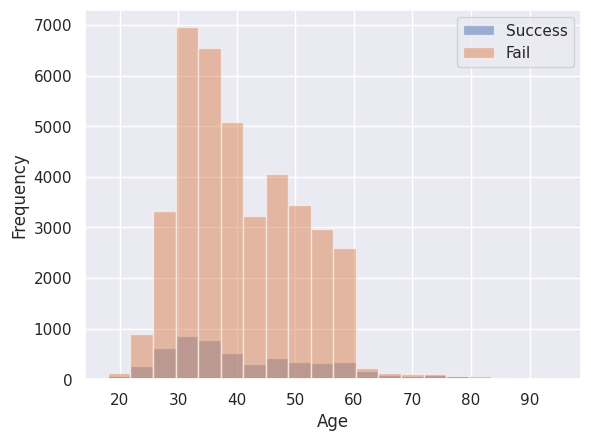

In [ ]:
# Filter the DataFrame for success and fail cases
success_cases = df[df['y'] == 1]
fail_cases = df[df['y'] == 0]

# Create histograms for age with 20 bins
plt.hist(success_cases['age'], bins=20, alpha=0.5, label='Success')
plt.hist(fail_cases['age'], bins=20, alpha=0.5, label='Fail')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

B

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- **D. Distributions have almost no intersection, the bigger the duration, the bigger the success.**

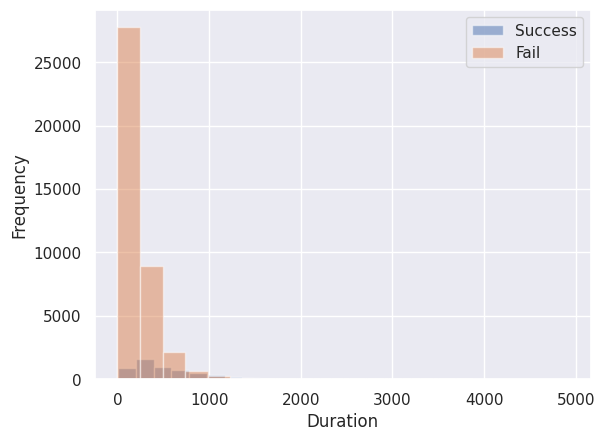

In [ ]:
# Filter the DataFrame for success and fail cases
success_cases = df[df['y'] == 1]
fail_cases = df[df['y'] == 0]

# Create histograms for duration with 20 bins
plt.hist(success_cases['duration'], bins=20, alpha=0.5, label='Success')
plt.hist(fail_cases['duration'], bins=20, alpha=0.5, label='Fail')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

D

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [ ]:
categorical_columns.append('day_of_week')
numerical_columns.remove('day_of_week')

In [ ]:
numerical_columns

['age', 'previous', 'campaign', 'pdays', 'balance', 'duration']

In [ ]:
#How many numerical columns are there?
len(numerical_columns)

6

-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [ ]:
# Compute the Pearson correlation coefficients
#8.1 balance
corr_balance = np.round(df['y'].corr(df['balance']),decimals = 3)
corr_balance

0.053

In [ ]:
#8.2 age
corr_age = np.round(df['y'].corr(df['age']),decimals = 3)
corr_age

0.025

In [ ]:
#8.3 duration
corr_duration = np.round(df['y'].corr(df['duration']),decimals = 3)
corr_duration

0.395

In [ ]:
#8.4 pdays
corr_pdays = np.round(df['y'].corr(df['pdays']),decimals = 3)
corr_pdays

0.104

In [ ]:
corr_campaign = np.round(df['y'].corr(df['campaign']),decimals = 3)
corr_campaign

-0.073

In [ ]:
corr_previous = np.round(df['y'].corr(df['previous']),decimals = 3)
corr_previous

0.093

In [ ]:
#8.5 What numerical feature has the highest Pearson correlation with the target variable?
correlation_dict = {'balance': corr_balance, 'age': corr_age, 'duration': corr_duration, 'pdays': corr_pdays, 'previous':corr_previous, 'campaign':corr_campaign}
highest_correlation_feature = max(correlation_dict, key=correlation_dict.get)
highest_correlation_feature

'duration'

-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

In [ ]:
numerical_columns.append('y')

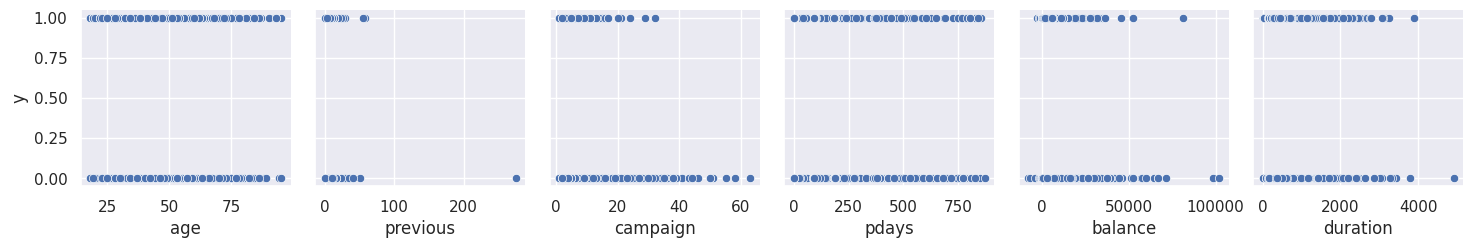

In [ ]:
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

sns.pairplot(data = df[numerical_columns],
             y_vars=['y'],
             x_vars=numerical_columns[:-1])

In [ ]:
numerical_columns.remove('y')

- Customers with **higher balances**, and customers who are contacted **more times** during the **campaign** are **less likely to accept** the term deposit.
- Others' correlations are **not very clear** to indicate if they (**age, duration, pdays, and previous**) might play a role in determining success.


## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [ ]:
# Create a binary column 'contacted_before'
df['contacted_before'] = (df['pdays'] != -1).astype(int)

# How many people were not contacted earlier?
df['contacted_before'].value_counts().get(0, 0)

36954

In [ ]:
data = pd.DataFrame.copy(df)

------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [ ]:
df.drop('y', axis=1, inplace=True)
df.shape[1]

17

-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [ ]:
cat_columns = [x for x in categorical_columns if x not in binary_columns]

In [ ]:
cat_columns

['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week']

In [ ]:
# TODO add one-hot labels and drop columns
# Create one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# Check the number of resulting columns after one-hot encoding
df.shape[1]

72

## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
#How many of successful deposit subsciptions are in train set?
y_train.sum().values[0]

4198

## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [ ]:
#Scale the numeric columns
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

#What is median value in duration field after scaling?
np.round(X_train['duration'].median(), decimals=3)

-0.299

## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [ ]:
# Initialize the SelectKBest with the F classifier
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit_transform(X_train, y_train)
top_feature_indices = selector.get_support(indices=True)
top_features = df.columns[top_feature_indices]

sorted(top_features,reverse=False)

['contacted_before', 'duration', 'poutcome_success']

------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [ ]:
param_grid = {'C': np.logspace(-2, 4, 7)}
# Create a logistic regression model with L2 penalty
logreg = LogisticRegression(penalty='l2', max_iter=400)

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=400), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [ ]:
#16.1 What is an optimal C for l2 regularization?
optimal_C = grid_search.best_params_['C']
optimal_C

0.1

In [ ]:
#16.2 What is the accuracy for this params?
optimal_logreg = LogisticRegression(penalty='l2', C= optimal_C, max_iter=400)
optimal_logreg.fit(X_train, y_train)
y_pred = optimal_logreg.predict(X_test)
accuracy = np.round(accuracy_score(y_test, y_pred),decimals = 3)
accuracy

0.901

In [ ]:
#16.3 What is the three most important features by logistic regression estimation?
coef_abs = np.abs(optimal_logreg.coef_)
top_feature_indices = np.argsort(coef_abs)[0][::-1][:3]
top_features = X_train.columns[top_feature_indices]
sorted(top_features,reverse = False)

['contact_unknown', 'month_mar', 'poutcome_success']

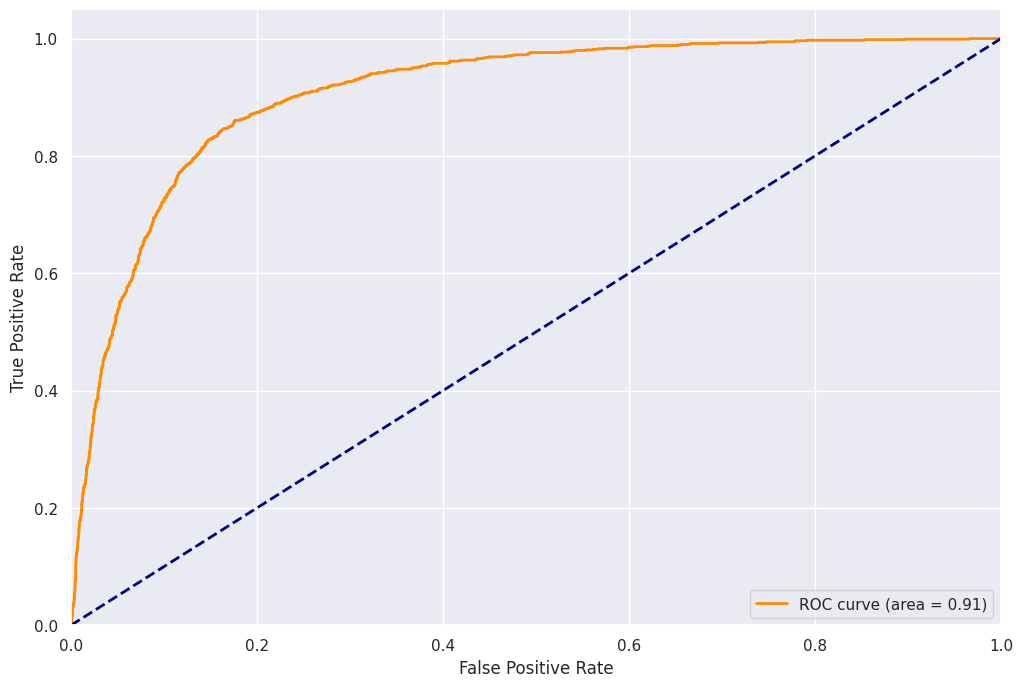

ROC-AUC score: 0.907


In [ ]:
#16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?
y_pred_proba = optimal_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print("ROC-AUC score:", np.round(roc_auc,decimals=3))

------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [ ]:
#17.1 What is an optimal depth and number of trees?
# Define hyperparameter values for depth and number of trees
param_grid = {
    'max_depth': list(range(2, 16)),
    'n_estimators': [10, 20, 50, 100, 200]
}
# Create a random forest model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Perform hyperparameter search using GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'n_estimators': [10, 20, 50, 100, 200]},
             scoring='roc_auc')

In [ ]:
# Get the optimal depth and number of trees
optimal_depth = grid_search.best_params_['max_depth']
optimal_n_estimators = grid_search.best_params_['n_estimators']
print(sorted([optimal_depth, optimal_n_estimators],reverse=True))

[200, 15]


In [ ]:
#17.2 What is the roc-auc for this params?
optimal_rf = RandomForestClassifier(max_depth=optimal_depth, n_estimators=optimal_n_estimators, random_state=42)
optimal_rf.fit(X_train, y_train)
y_pred_proba_rf = optimal_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
np.round(roc_auc_rf,decimals=3)

0.925

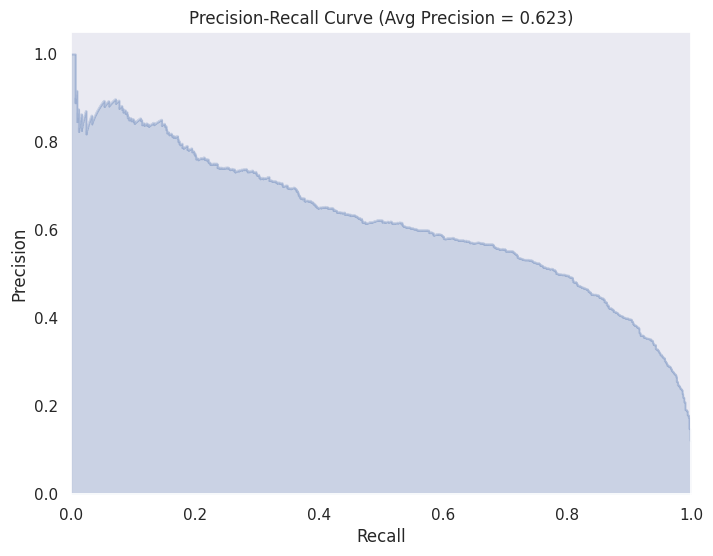

In [ ]:
#17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)
average_precision = average_precision_score(y_test, y_pred_proba_rf)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Avg Precision = {average_precision:.3f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid()
plt.show()

In [ ]:
# Find the highest precision for recall > 0.5
np.round(max(precision[recall > 0.5]),decimals=3)

0.623

In [ ]:
#17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
index = np.argmin(np.abs(thresholds - 0.3))
np.round(recall[index],decimals=3)

0.66

In [ ]:
#17.7 What is the three most important features by random forest?
feature_importance = optimal_rf.feature_importances_
top_feature_indices_rf = feature_importance.argsort()[::-1][:3]
top_features_rf = X_train.columns[top_feature_indices_rf]
sorted(top_features_rf,reverse=False)

['age', 'duration', 'poutcome_success']

-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [ ]:
features = pd.Series(optimal_rf.feature_importances_, index=X_train.columns)
features.sort_values(ascending=False, inplace=True)
features = list(features.index)
features = features[:30]
features

['duration',
 'poutcome_success',
 'age',
 'balance',
 'pdays',
 'housing',
 'campaign',
 'previous',
 'month_mar',
 'contact_unknown',
 'month_oct',
 'month_sep',
 'month_jun',
 'contacted_before',
 'month_may',
 'poutcome_unknown',
 'marital_married',
 'month_aug',
 'education_tertiary',
 'month_jul',
 'marital_single',
 'education_secondary',
 'loan',
 'job_management',
 'job_blue-collar',
 'job_technician',
 'month_nov',
 'job_student',
 'month_dec',
 'job_retired']

In [ ]:
#18.1 What is the roc-auc score for this model?
# Select the top 30 features based on their importance
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [ ]:
# Train a new random forest model with the selected features
rf_new = RandomForestClassifier(max_depth=optimal_depth, n_estimators=optimal_n_estimators, random_state=42)
rf_new.fit(X_train_selected, y_train)

# Calculate the ROC-AUC score for the new model on the test set
y_pred_selected = rf_new.predict_proba(X_test_selected)[:, 1]
roc_auc_selected = roc_auc_score(y_test, y_pred_selected)
np.round(roc_auc_selected,decimals=3)

0.921

In [ ]:
#18.2 What is the f1 score for this model?
y_pred_selected = rf_new.predict(X_test_selected)
f1_score_selected = f1_score(y_test, y_pred_selected)
np.round(f1_score_selected,decimals=3)

0.478

The ROC-AUC score of the previous random forest model is 0.926, while the ROC-AUC score of the model with the top 30 selected features is 0.921. In this case, the ROC-AUC score has decreased slightly after feature selection suggests that the classification quality has not improved and, in fact, has decreased. It appears that the model's initial set of features might have been more informative for the classification task.

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

These are top-3 features of
- ANOVA: ['contacted_before', 'duration', 'poutcome_success']
- Logistic regression: ['contact_unknown', 'month_mar', 'poutcome_success']
- Random forest: ['age', 'duration', 'poutcome_success']

We can see that '***poutcome_success***' is a consistent top feature in all three methods, reflecting the influence of past successful marketing interactions on the current campaign's success. This suggests that this feature is likely to be strong predictor of the target variable (subscription to a term deposit).

**Random Forest** and **ANOVA** both select **'*duration*'** and **'*poutcome_success*'** as important features, indicating their consistency in identifying predictive power.

**Logistic Regression** includes '***month_mar***' and '***contact_unknown***,' which are not as prominent in the other methods.

***'contact_unknown'*** is a strange feature because it represents NaN values in the 'contact' column.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [ ]:
#20.1 Generate two (or more) meaningfull features
# Total contacts: number of contacts performed before and during this campaign and for this client
df['contacted'] = df['campaign'] + df['previous']
# higher weights to customers with tertiary education and lower weights to those with secondary or unknown education
df['education_summary'] = df['education_tertiary'] * 3 + df['education_secondary'] * 2 + df['education_unknown']

In [ ]:
# Preprocessing for CatBoost
X_train_catboost, X_test_catboost, y_train_catboost, y_test_catboost = train_test_split(df, y, test_size=0.33, random_state=42)

In [ ]:
#20.3 Train a gradient boosting, that beats random forest using CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_model.fit(X_train_catboost, y_train_catboost)

#Evaluate CatBoost model
y_pred_catboost = catboost_model.predict(X_test_catboost)
accuracy_catboost = np.round(accuracy_score(y_test_catboost, y_pred_catboost),decimals = 3)
roc_auc_catboost = np.round(roc_auc_score(y_test_catboost, catboost_model.predict_proba(X_test_catboost)[:, 1]),decimals = 3)

In [ ]:
accuracy_catboost

0.908

In [ ]:
roc_auc_catboost

0.934

In [ ]:
'CatBoost is better' if roc_auc_catboost >= roc_auc_rf else 'Random Forest is better'

'CatBoost is better'